# Fashion MNIST 추론

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

import requests
import json

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Label 정의

In [2]:
labels = {'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat', '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'}

# 추론

In [3]:
def fashion_mnist_show(n):
    image = test_images[n]
    image_reshaped = image.reshape(28, 28)
    label = labels[str(test_labels[n])]
    plt.figure(figsize = (2, 2))
    plt.title("sample of " + str(label))
    plt.imshow(image_reshaped, cmap="gray")
    plt.show()

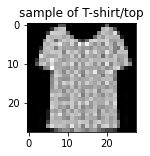

In [6]:
fashion_mnist_show(1000)

In [30]:
def fashion_mnist_inference(n):
    image = test_images[n]
    image = image.reshape(-1, 28, 28, 1)
    headers = {"content-type": "application/json"}
    payload = json.dumps({"signature_name": "serving_default",
                          "instances": image.tolist()})
    response = requests.post('http://localhost:8501/v1/models/mnist:predict',
                              data=payload, headers=headers)
    return response.json()

In [31]:
fashion_mnist_inference(100)

ConnectionError: HTTPConnectionPool(host='localhost', port=8501): Max retries exceeded with url: /v1/models/mnist:predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff4a14a93d0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [25]:
def fashion_mnist_get_inference_result(n):
    fashion_mnist_show(n)
    response = fashion_mnist_inference(n)
    prediction_list = response['predictions'][0]
    prediction = labels[str(prediction_list.index(max(prediction_list)))]
    return "prediction result:{}".format(prediction)

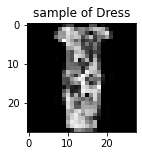

'prediction result:Dress'

In [26]:
fashion_mnist_get_inference_result(100)